In [13]:
import yfinance as yf

ticker = "SPY"
price = yf.download(ticker, start="1970-01-01", auto_adjust=False)["Adj Close"]
price.head()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Ticker,SPY
Date,


In [7]:
ret = 100*price.resample("ME").last().pct_change().dropna()


In [8]:
ret

Ticker,SPY
Date,


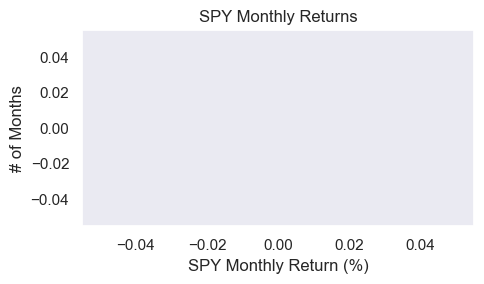

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")
# Create a figure for the histogram with kernel density plot
plt.figure(figsize=(5, 3))
sns.histplot(100*ret.dropna(), kde=True, bins=30, legend=False)
plt.title('SPY Monthly Returns')
plt.xlabel('SPY Monthly Return (%)')
plt.ylabel('# of Months')
plt.tight_layout()
plt.savefig("../posts/02-online-data/spy.jpg")
plt.show()

In [12]:
keep = abs(keep)

In [15]:
(abs(keep) > 1e-6).sum()/(2025-1993)

Ticker
SPY    4.4375
dtype: float64

In [16]:
keep.head()

Ticker,SPY
Date,
1993-01-29,NaN
1993-02-01,7.989953e-07
1993-02-02,1.199510e-07
1993-02-03,4.426467e-07
1993-02-04,7.596711e-07


In [20]:
keep[keep.SPY>1e-5]






Ticker,SPY
Date,
1993-03-19,0.004693
1993-06-18,0.006980
1993-09-17,0.006181
1993-12-17,0.006836
1994-03-18,0.005734
...,...
2024-03-15,0.003076
2024-06-21,0.003212
2024-09-20,0.003053


In [5]:
flag = int(input("input 0 for market or 1 for yahoo return"))
data = ret if flag else mkt
name = f"{ticker.upper()} Return" if flag else "Market Return"

input 0 for market or 1 for yahoo return1


# FIGURE 1

In [6]:
import plotly.graph_objects as go

trace = go.Scatter(
    x=data.index.to_list(),
    y=data,
    hovertemplate="%{x}<br>return = %{y:.1%}",
    mode="lines+markers"
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title=name,
    template="plotly_white"
)
fig.show()

# FIGURE 2

In [7]:
trace = go.Box(
    y=data,
    text=data.index.to_list(),
    hovertemplate="%{text}<br>%{y:.1%}<extra></extra>",
    name=""
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title="",
    yaxis_title=name,
    yaxis_tickformat=".0%",
    template="plotly_white",
)
fig.show()

# FIGURE 3

In [8]:
trace = go.Histogram(
    x=data,
    name=""
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title=name,
    xaxis_tickformat=".0%",
    yaxis_title="Number of Years",
    template="plotly_white",
)
fig.show()

# FIGURE 4

In [9]:
trace = go.Scatter(
    x = data.index.to_list(),
    y=(1+data).cumprod(),
    hovertemplate="%{x}<br>accumulation = $%{y:.2f}<extra></extra>",
    mode="lines",
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title="Year",
    yaxis_title=name.split()[0] + " Cumulative Return",
    yaxis_tickformat=":.2f",
    template="plotly_white"
)
fig.show()


# FIGURE 5

In [10]:
trace = go.Scatter(
    x = data.index.to_list(),
    y=(1+data).cumprod(),
    hovertemplate="%{x}<br>accumulation = $%{y:.2f}<extra></extra>",
)
fig = go.Figure(trace)
fig.update_layout(
    yaxis_type="log",
    xaxis_title="Year",
    yaxis_title=name.split()[0] + " Cumulative Return",
    template="plotly_white"
)
fig.show()